Primeras 10 filas del DataFrame:
   Ángulo (rad) Serie Nº 10  Intensidad luminosa (%) Serie Nº 10
0                       0.0                                  1.2
1                       NaN                                  1.2
2                       NaN                                  1.2
3                       0.0                                  NaN
4                       NaN                                  1.2
5                       NaN                                  1.2
6                       0.0                                  1.2
7                       NaN                                  1.2
8                       NaN                                  1.3
9                       0.0                                  NaN

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5768 entries, 0 to 5767
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               ----------

C:\Users\USER\AppData\Local\Temp\ipykernel_17424\3980031127.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['Ángulo (rad) Serie Nº 10'] = df_clean['Ángulo (rad) Serie Nº 10'].fillna(method='ffill')


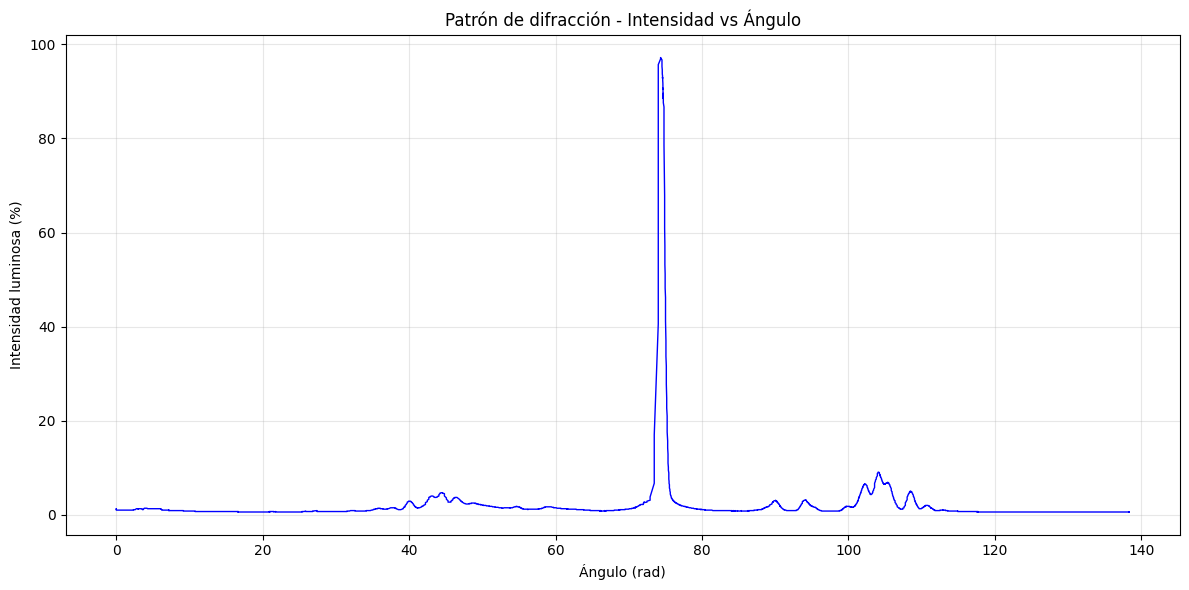

In [1]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
df = pd.read_csv('1.csv', sep=';', decimal=',', encoding='utf-8')

# Mostrar las primeras filas para entender la estructura
print("Primeras 10 filas del DataFrame:")
print(df.head(10))

# Ver información sobre el DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con valores nulos en ambas columnas
df_clean = df.dropna(subset=['Ángulo (rad) Serie Nº 10', 'Intensidad luminosa (%) Serie Nº 10'], how='all')

# Llenar valores nulos en la columna de ángulo con el último valor válido (forward fill)
df_clean['Ángulo (rad) Serie Nº 10'] = df_clean['Ángulo (rad) Serie Nº 10'].fillna(method='ffill')

# Eliminar filas donde la intensidad luminosa es nula
df_clean = df_clean.dropna(subset=['Intensidad luminosa (%) Serie Nº 10'])

# Convertir las columnas a arrays numpy
angulos = df_clean['Ángulo (rad) Serie Nº 10'].values
intensidades = df_clean['Intensidad luminosa (%) Serie Nº 10'].values

# Mostrar información sobre los arrays resultantes
print(f"\nNúmero de puntos de ángulo: {len(angulos)}")
print(f"Número de puntos de intensidad: {len(intensidades)}")
print(f"\nPrimeros 10 valores de ángulo: {angulos[:10]}")
print(f"Primeros 10 valores de intensidad: {intensidades[:10]}")

# Guardar los arrays en un archivo numpy para uso futuro
np.savez('datos_espectro.npz', angulos=angulos, intensidades=intensidades)

print("\nDatos guardados en 'datos_espectro.npz'")

# Opcional: Crear un gráfico rápido para visualizar los datos
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(angulos, intensidades, 'b-', linewidth=1)
plt.xlabel('Ángulo (rad)')
plt.ylabel('Intensidad luminosa (%)')
plt.title('Patrón de difracción - Intensidad vs Ángulo')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('patron_difraccion.png', dpi=300)
plt.show()